# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from scipy.sparse import hstack
from sklearn.metrics import f1_score



In [2]:
# Use the raw file URLs from GitHub
train_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/train.csv'
test_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/test.csv'
submission_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/sample_submission.csv'

In [3]:
# Read the data
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)
submission_data = pd.read_csv(submission_data_url)

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.shape

(7613, 5)

In [10]:
train_data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

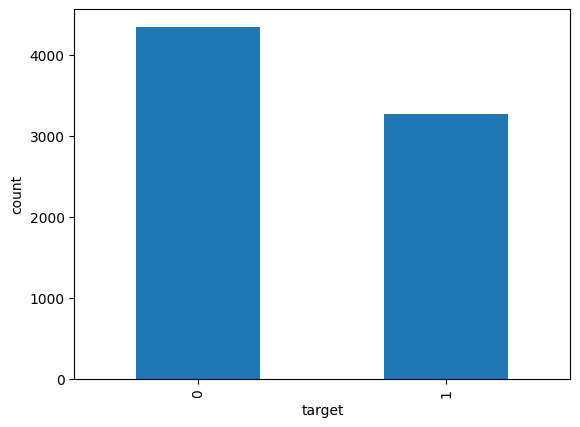

In [11]:
sns.countplot(train_data['target'])
train_data['target'].value_counts().plot(kind='bar')


<function matplotlib.pyplot.show(close=None, block=None)>

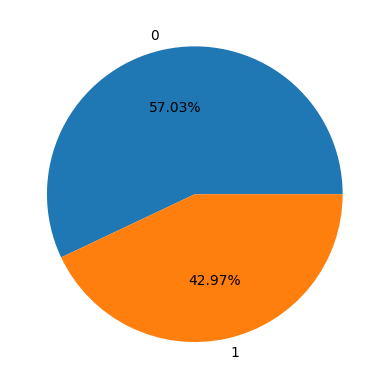

In [12]:

plt.pie(train_data['target'].value_counts(), labels=train_data['target'].value_counts().index, autopct='%0.2f%%')
plt.show

In [13]:
train_data['num_characters'] = train_data['text'].apply(lambda x: len(str(x)))

train_data

,id,keyword,location,text,target,num_characters
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [14]:

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajlaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rajlaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
train_data['num_words'] = train_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
train_data

,id,keyword,location,text,target,num_characters,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21


In [16]:
train_data['num_sentences']=train_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
train_data

,id,keyword,location,text,target,num_characters,num_words,num_sentences
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21,2


In [17]:
train_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7613.000000,7613.000000,7613.000000
mean,101.037436,18.917904,1.558518
std,33.781325,6.873545,0.966000
min,7.000000,1.000000,1.000000
25%,78.000000,14.000000,1.000000
50%,107.000000,19.000000,1.000000
75%,133.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


In [18]:
train_data[train_data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3271.000000,3271.000000,3271.000000
mean,108.113421,19.258025,1.414246
std,29.309854,6.018835,0.792105
min,14.000000,2.000000,1.000000
25%,88.000000,15.000000,1.000000
50%,115.000000,20.000000,1.000000
75%,136.000000,24.000000,2.000000
max,151.000000,39.000000,8.000000


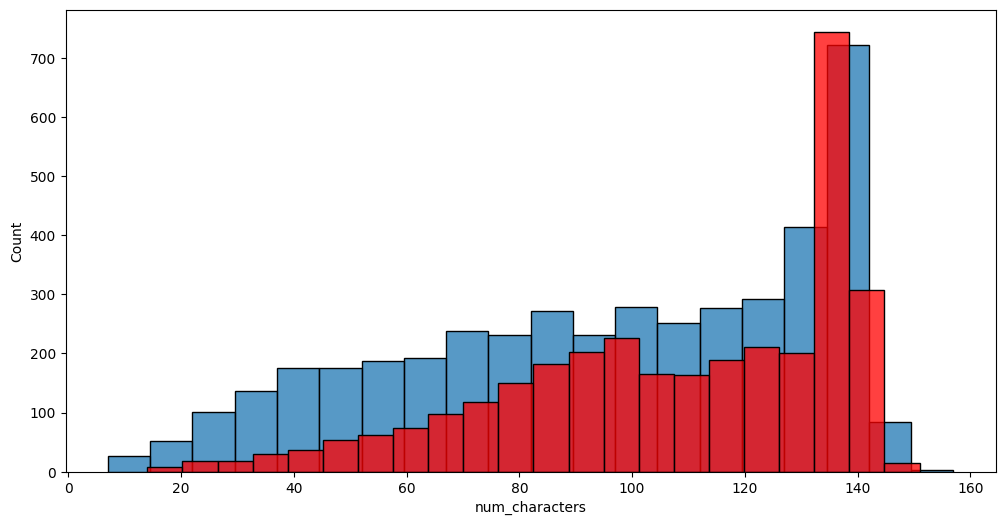

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_characters'])
sns.histplot(train_data[train_data['target']==1]['num_characters'],color='red')
plt.show()

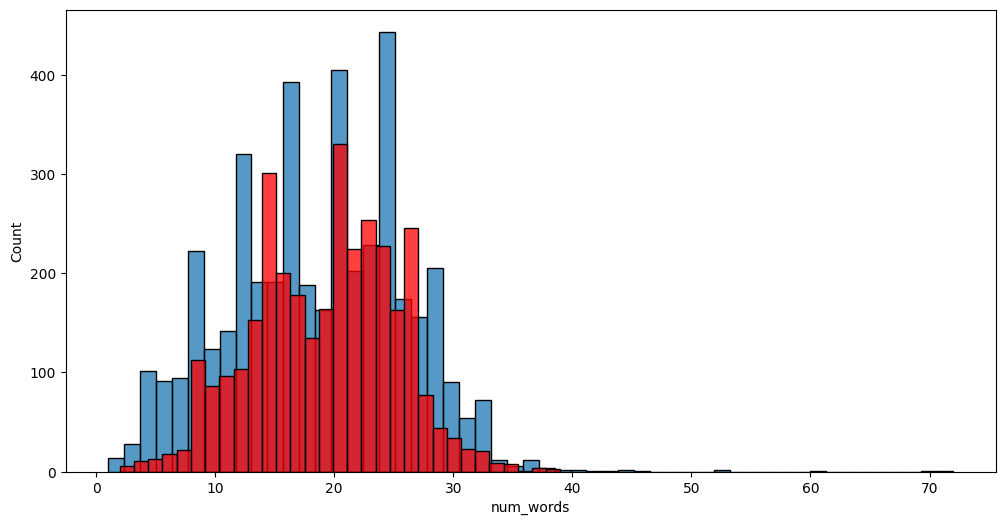

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_words'])
sns.histplot(train_data[train_data['target']==1]['num_words'],color='red')
plt.show()

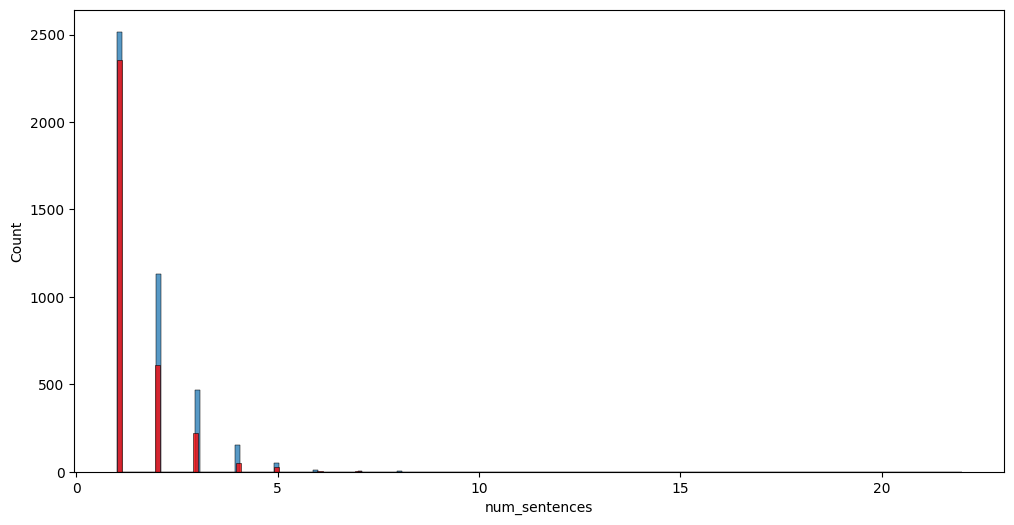

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_sentences'])
sns.histplot(train_data[train_data['target']==1]['num_sentences'],color='red')
plt.show()

# Text Preprocessing

In [22]:
train_data

,id,keyword,location,text,target,num_characters,num_words,num_sentences
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21,2


In [23]:
train_data.drop(columns=['location','keyword'],inplace=True)

In [24]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
test_data.drop(columns=['location','keyword'],inplace=True)

In [26]:
train_data['text'] = train_data['text'].str.lower()

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajlaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rajlaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
import re
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    return text

train_data['text'] = train_data['text'].apply(clean_text)

In [30]:
train_data['text'] = train_data['text'].str.replace(r"[^a-zA-Z\s]", "", regex=True)

In [31]:
from nltk.tokenize import word_tokenize
train_data['tokens'] = train_data['text'].apply(word_tokenize)

In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
train_data['tokens'] = train_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [33]:
#Stemming or Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train_data['tokens'] = train_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [34]:
train_data

,id,text,target,num_characters,num_words,num_sentences,tokens
0,1,our deeds are the reason of this earthquake ma...,1,69,14,1,"[deed, reason, earthquake, may, allah, forgive..."
1,4,forest fire near la ronge sask canada,1,38,8,2,"[forest, fire, near, la, ronge, sask, canada]"
2,5,all residents asked to shelter in place are be...,1,133,24,2,"[resident, asked, shelter, place, notified, of..."
3,6,people receive wildfires evacuation orders in...,1,65,9,1,"[people, receive, wildfire, evacuation, order,..."
4,7,just got sent this photo from ruby alaska as s...,1,88,18,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,two giant cranes holding a bridge collapse int...,1,83,13,1,"[two, giant, crane, holding, bridge, collapse,..."
7609,10870,the out of control wild fires in california ...,1,125,24,2,"[control, wild, fire, california, even, northe..."
7610,10871,m utckm s of volcano hawaii,1,65,15,2,"[utckm, volcano, hawaii]"
7611,10872,police investigating after an ebike collided w...,1,137,21,2,"[police, investigating, ebike, collided, car, ..."


In [35]:
#'Disaster'
Disaster_corpus = []
for msg in train_data[train_data['target'] == 1]['tokens'].tolist():
    for word in msg:
        Disaster_corpus.append(word)

In [36]:
len(Disaster_corpus)

30356

In [37]:
from collections import Counter

Disaster_counter = Counter(Disaster_corpus)
Disaster_counter.most_common(30)

[('fire', 265),
 ('news', 138),
 ('via', 121),
 ('disaster', 118),
 ('california', 115),
 ('suicide', 110),
 ('u', 107),
 ('police', 107),
 ('amp', 107),
 ('people', 106),
 ('family', 105),
 ('home', 101),
 ('train', 100),
 ('building', 94),
 ('killed', 93),
 ('like', 92),
 ('storm', 91),
 ('bomb', 91),
 ('hiroshima', 90),
 ('crash', 89),
 ('pm', 89),
 ('year', 86),
 ('wildfire', 80),
 ('flood', 79),
 ('emergency', 76),
 ('attack', 76),
 ('bombing', 75),
 ('car', 73),
 ('two', 72),
 ('accident', 72)]

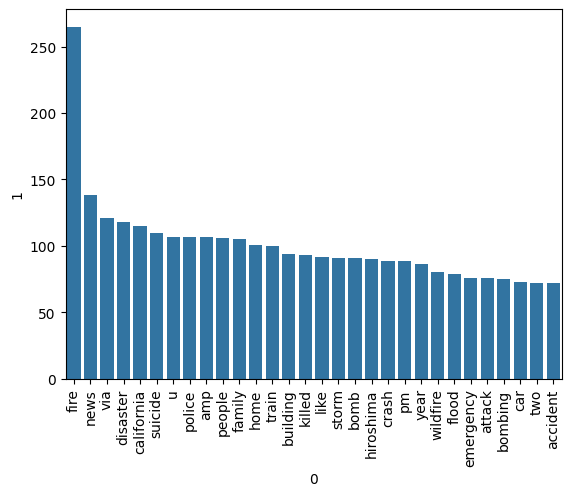

In [38]:
sns.barplot(x=pd.DataFrame(Disaster_counter.most_common(30))[0],y=pd.DataFrame(Disaster_counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
#'Not Disaster'

Not_Disaster_corpus = []
for msg in train_data[train_data['target'] == 0]['tokens'].tolist():
    for word in msg:
        Not_Disaster_corpus.append(word)

In [40]:
len(Not_Disaster_corpus)

36435

In [41]:
from collections import Counter

Not_Disaster_counter = Counter(Not_Disaster_corpus)
Not_Disaster_counter.most_common(30)

[('like', 255),
 ('im', 248),
 ('amp', 193),
 ('get', 185),
 ('new', 170),
 ('dont', 154),
 ('u', 148),
 ('one', 136),
 ('body', 117),
 ('time', 104),
 ('video', 102),
 ('via', 99),
 ('day', 97),
 ('would', 97),
 ('love', 95),
 ('people', 92),
 ('go', 91),
 ('got', 91),
 ('know', 90),
 ('fire', 88),
 ('cant', 86),
 ('let', 86),
 ('back', 85),
 ('see', 84),
 ('bag', 83),
 ('full', 82),
 ('emergency', 82),
 ('want', 81),
 ('make', 76),
 ('going', 75)]

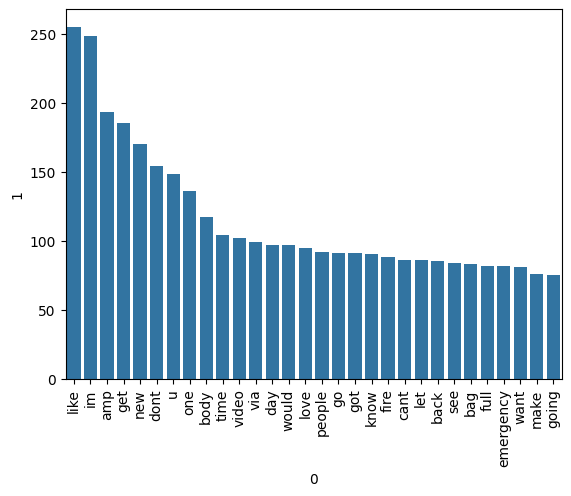

In [42]:
sns.barplot(x=pd.DataFrame(Not_Disaster_counter.most_common(30))[0],y=pd.DataFrame(Not_Disaster_counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Feature Engineering

Transform text into numerical features that models can understand.

1. Bag of Words (BoW)

In [43]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(train_data['text']).toarray()

2. TF-IDF

In [44]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(train_data['text']).toarray()

In [45]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Building

**method 01**

**Bag of words**

In [46]:
X =  X_bow
y = train_data['target']


In [47]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763 111]
 [187 462]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       874
           1       0.81      0.71      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523



TF-IDF Vectorization**

In [50]:
X = X_tfidf  
y = train_data['target']


In [51]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate


In [53]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[795  79]
 [215 434]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       874
           1       0.85      0.67      0.75       649

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [54]:
X_test_tfidfnew= tfidf.transform(test_data['text'])

In [55]:
test_predictions = model.predict(X_test_tfidfnew)

In [56]:
test_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Method 2

**Word2Vec embedding**

In [57]:
sentences = [text.split() for text in train_data['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_embeddings(text):
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(embeddings) == 0:
        return np.zeros(100)
    return np.mean(embeddings, axis=0)

train_data['embeddings'] = train_data['text'].apply(get_word2vec_embeddings)
test_data['embeddings'] = test_data['text'].apply(get_word2vec_embeddings)

**TF-IDF Vectorization**

In [58]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range = (1,2))  
X_tfidf_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_tfidf_test = tfidf_vectorizer.transform(test_data['text'])

**Convert Word2Vec embeddings to array**

In [59]:
X_w2v_train = np.stack(train_data['embeddings'])
X_w2v_test = np.stack(test_data['embeddings'])

**Combine TF-IDF and Word2Vec**

In [60]:
X_train_combined = hstack([X_tfidf_train, X_w2v_train])
X_test_combined = hstack([X_tfidf_test, X_w2v_test])

**Model Building**

In [61]:

y_train = train_data['target']
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_train_split, y_train_split)

LogisticRegression(random_state=42)

**Evaluate on Validation Set**


In [63]:
y_val_pred = model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(f"Validation F1 Score: {f1:.2f}")

Validation F1 Score: 0.75


# Conclusion 

- We successfully analyzed and processed a dataset of tweets to classify them as either disaster-related or non-disaster-related. 
- Through data cleaning, text preprocessing, and feature extraction techniques like Bag of Words and TF-IDF, we transformed the tweets into numerical features suitable for machine learning models.  
- This work sets the foundation for building and evaluating machine learning models to classify tweets accurately, with potential for further improvements and model tuning.
- Logistic Regression demonstrated the highest performance in the disaster tweet classification task, achieving an accuracy of 81% with TF-IDF feature engineering. 
- However, the exploration of alternative techniques, such as Word2Vec and combinations of TF-IDF with Word2Vec, did not yield significantly better results. 
- This highlights substantial room for improvement in feature representation and model optimization.

Future Steps:
- Advanced Word Embeddings: Experimenting with state-of-the-art embeddings like GloVe or leveraging pre-trained transformer models such as BERT can capture richer semantic relationships.